In [3]:
from IPython.display import Image
Image(url='https://github.com/hamidmousavi0/reliable-relu-toolbox/blob/master/images/RReLU.png?raw=true')


## Reliable ReLU Toolbox (RReLU) To Enhance Resilience of DNNs


---
The Reliable ReLU Toolbox (RReLU) is a powerful reliability tool designed to enhance the resiliency of deep neural networks (DNNs) by generating reliable ReLU activation functions.

---

 It is Implemented for the popular PyTorch deep learning platform. RReLU allows users to find a clipped ReLU activation function using various methods.

---

This tool is highly versatile for dependability and reliability research, with applications ranging from resiliency analysis of classification networks to training resilient models and improving DNN interpretability.

---

RReLU includes all state-of-the-art activation restriction methods. These methods offer several advantages: they do not require retraining the entire model, avoid the complexity of fault-aware training, and are non-intrusive, meaning they do not necessitate any changes to an accelerator.

---

it includes implementations of the following algorithms:


1.   **[FitAct: Error Resilient Deep Neural Networks via Fine-Grained Post-Trainable Activation Functions](https://arxiv.org/pdf/2112.13544)**



2.   **[FT-ClipAct: Resilience Analysis of Deep Neural Networks and Improving their Fault Tolerance using Clipped Activation](https://arxiv.org/pdf/1912.00941)**
3. **[Ranger: A Low-cost Fault Corrector for Deep Neural Networks through Range Restriction](https://arxiv.org/pdf/2003.13874)**
4. **[ProAct: Progressive Training for Hybrid Clipped Activation Function to Enhance Resilience of DNNs](https://arxiv.org/pdf/2406.06313)**




# What is Deeo Neural Network?

![image.png](https://static-assets.codecademy.com/Courses/intro-to-pytorch/hidden.svg)

# ❓ What is the issue with ReLU?

![image.png](https://www.researchgate.net/profile/Saad-Albawi/publication/328048988/figure/fig17/AS:677675828011008@1538581916318/Figure-316-Rectified-Linear-Unit-94.jpg)

# ✅ What is the solution?

![image.png](https://miro.medium.com/v2/resize:fit:1400/1*3EKmtgzcSMe237_sUNovGg.png)




**❓How can we found the bound value for each ReLU activation function?**



**❓If the output activation is higher than bound, what should we do?**




**❓IS there any real situation that changed the activation value a lot?**



**❓Do we need to find one bound value for each layer or neuron?**







# Data representation in Neural Network

# Fixed-Point Number

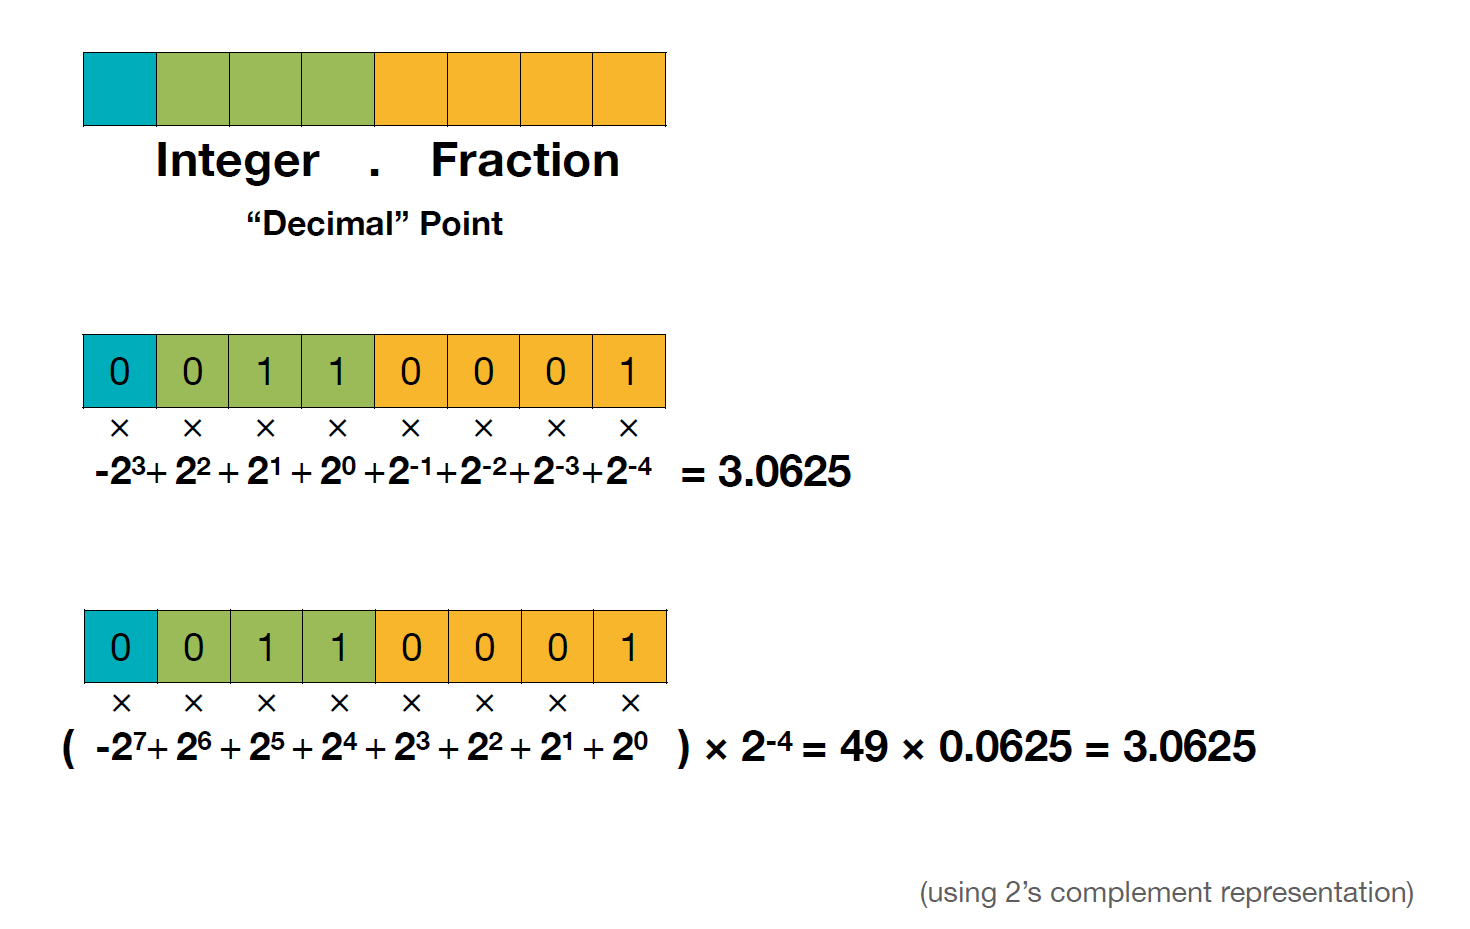

# Floating-Point Number

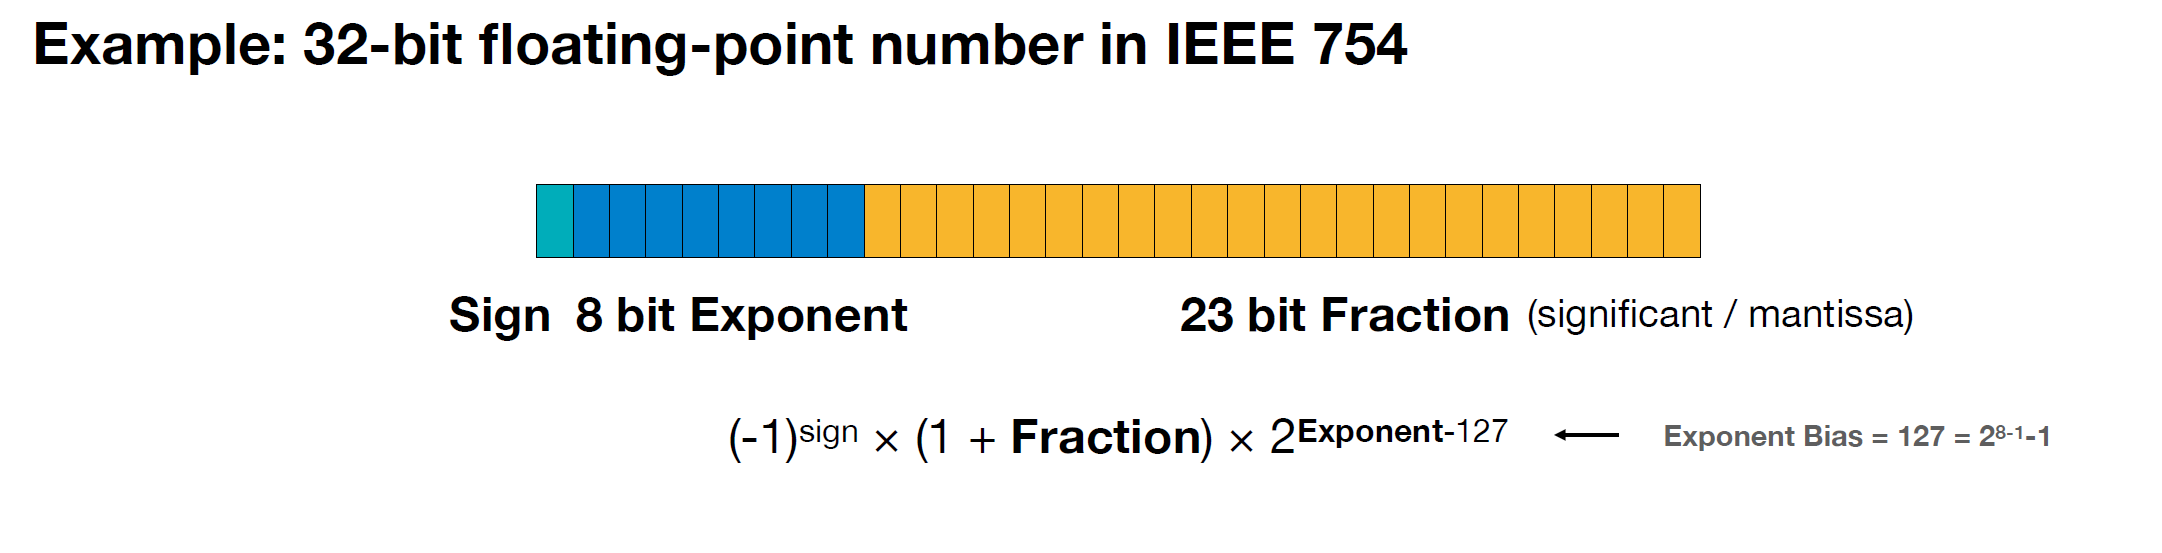

## Install Packages and Clone the RReLU Github Repository

In [4]:
!pip install fxpmath

In [5]:
!git clone https://github.com/hamidmousavi0/reliable-relu-toolbox.git

fatal: destination path 'reliable-relu-toolbox' already exists and is not an empty directory.


In [6]:
cd reliable-relu-toolbox/

/content/reliable-relu-toolbox


## Build Data Loader

---

First, We need to create the Dataset

In [7]:
from rrelu.setup import build_data_loader

In [8]:
data_loader_dict, n_classes = build_data_loader(dataset='cifar10', batch_size=128, image_size=32)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


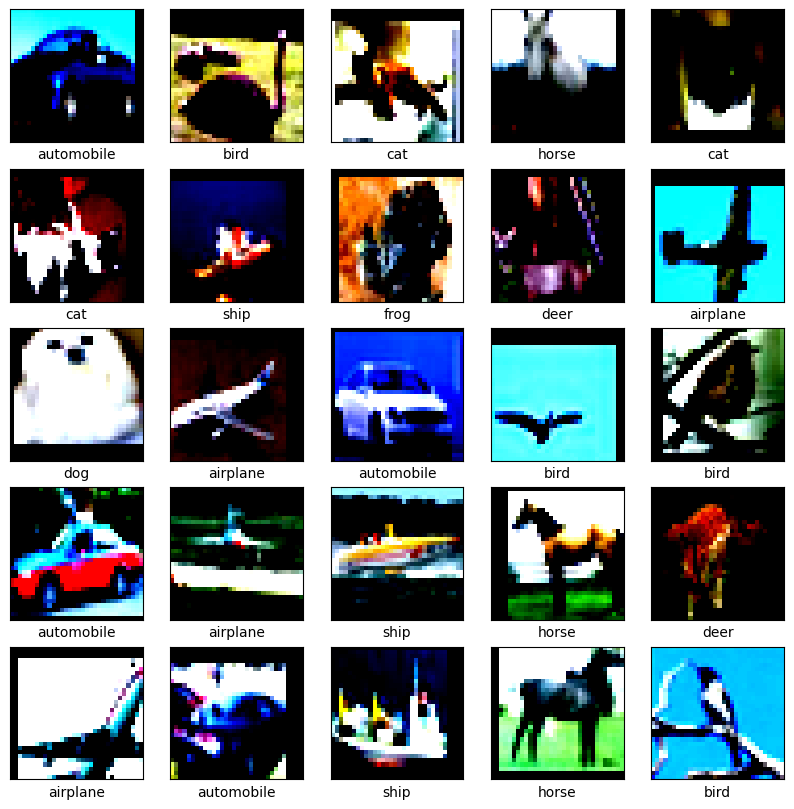

In [9]:

import matplotlib.pyplot as plt

# Get the first batch from the training data loader
images, labels = next(iter(data_loader_dict['train']))

# Get the class names for CIFAR-10
# This assumes CIFAR-10 is used as specified in the previous cell
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Transpose the image tensor to be in HxWxC format for plotting
    plt.imshow(images[i].permute(1, 2, 0))
    # The CIFAR10 labels are indices, so we use the class_names list
    plt.xlabel(class_names[labels[i].item()])
plt.show()

# Build Model

---
- Our tool support pre-trained models on CIFAR-10, CIFAR-100, and ImageNet Dataset

- Cifar-10 and Cifar-100 supported models:
    *   resnet20, resnet32, resnet44, resnet56
    *   vgg11_bn, vgg13_bn, vgg16_bn, vgg19-bn
    *   mobilenetv2_x0_5, mobilenetv2_x0_75
    *   shufflenetv2_x1_5

- ImageNet supported Models:
    - All the models in the PyTorch-hub
    



In [19]:
from rrelu.setup import build_model

In [25]:
model = build_model(name='resnet20',dataset='cifar10', n_classes=n_classes)
print(model)

CifarResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3),

# Evaluate the original Model with ReLU activation function

In [26]:
from metrics import eval_cpu

In [27]:
print(eval_cpu(model, data_loader_dict))

Eval:   0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Eval: 100%|██████████| 79/79 [00:15<00:00,  4.94it/s, loss=0.282, top1=92.6, top5=99.8, #samples=1e+4, batch_size=16, img_size=32]

{'val_top1': 92.5999984741211, 'val_top5': 99.80999755859375, 'val_loss': 0.28152206540107727}


# Convert Floating-Point weight values to the Fixed-Point

In [28]:
import torch
from fxpmath import Fxp
with torch.no_grad():
    for name, param in model.named_parameters():
        if param is not None:
            param.copy_(torch.tensor(Fxp(param.clone().cpu().numpy(), True, n_word=32, n_frac=16, n_int=15).get_val(),dtype=torch.float32,device='cpu'))

# Evaluate the Fixed-Point Model

In [29]:
print(eval_cpu(model, data_loader_dict))

Eval: 100%|██████████| 79/79 [00:15<00:00,  5.07it/s, loss=0.281, top1=92.6, top5=99.8, #samples=1e+4, batch_size=16, img_size=32]

{'val_top1': 92.58999633789062, 'val_top5': 99.80999755859375, 'val_loss': 0.28144317865371704}


# Evaluating Reliability of the model

In [30]:
from metrics import eval_fault_cpu
print(eval_fault_cpu(model, data_loader_dict, 1e-6, bitflip='fixed',iterations=5))

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


============================ PYTORCHFI INIT SUMMARY ==============================

Layer types allowing injections:
----------------------------------------------------------------------------------
   - Conv2d
   - Linear
   - Relu_bound

Model Info:
----------------------------------------------------------------------------------
   - Shape of input into the model: (3 32 32 )
   - Batch Size: 128
   - CUDA Enabled: False

Layer Info:
----------------------------------------------------------------------------------
Layer #                           Layer type  Dimensions         Weight Shape         Output Shape           Bias Shape
----------------------------------------------------------------------------------
    0                               Conv2d           4        [16, 3, 3, 3]      [1, 16, 32, 32]               [None]
    1                               Conv2d           4       [16, 16, 3, 3]      [1, 16, 32, 32]               [None]
    2                               

Eval: 100%|██████████| 5/5 [01:23<00:00, 16.76s/it, loss=7.52e+3, top1=40, top5=70.9, #samples=5e+4, batch_size=16, img_size=32, fault_rate=1e-6]

{'val_top1': 40.01599884033203, 'val_top5': 70.85199737548828, 'val_loss': 7520.78759765625, 'fault_rate': 1e-06}


# Build the model with Reliable ReLU

In [31]:
from rrelu.setup import replace_act
model = replace_act(model, 'zero', 'ranger', data_loader_dict, 'layer', 'fixed',False ,'cifar10',is_root=True,)

In [32]:
from metrics import eval_fault_cpu

In [33]:
print(eval_fault_cpu(model, data_loader_dict, 1e-6, bitflip='fixed',iterations=5))

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


============================ PYTORCHFI INIT SUMMARY ==============================

Layer types allowing injections:
----------------------------------------------------------------------------------
   - Conv2d
   - Linear
   - Relu_bound

Model Info:
----------------------------------------------------------------------------------
   - Shape of input into the model: (3 32 32 )
   - Batch Size: 128
   - CUDA Enabled: False

Layer Info:
----------------------------------------------------------------------------------
Layer #                           Layer type  Dimensions         Weight Shape         Output Shape           Bias Shape
----------------------------------------------------------------------------------
    0                               Conv2d           4        [16, 3, 3, 3]      [1, 16, 32, 32]               [None]
    1                    bounded_relu_zero           4                  [0]      [1, 16, 32, 32]               [None]
    2                               

Eval: 100%|██████████| 5/5 [01:45<00:00, 21.06s/it, loss=0.305, top1=92, top5=99.8, #samples=5e+4, batch_size=16, img_size=32, fault_rate=1e-6]

{'val_top1': 92.0, 'val_top5': 99.7760009765625, 'val_loss': 0.3048895597457886, 'fault_rate': 1e-06}




```
# This is formatted as code
```



In [ ]:
# rm -r reliable-relu-toolbox/